![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

# Transições

# Parte 1: Newton

Vamos ver em um caso o que acontece para o método de Newton não convergir.

Comece com o método em si:

In [2]:
def newton_solve(f, df, y, x0, xtol=1e-8, ytol=1e-8, maxiter=100, full=False):
    """Newton's algorithm for solving  f(x) = y  starting from  x0.
    Also returns the number of evaluations of f.
    
    Se full=True, retorna a lista de todos os pontos gerados. (só usado a partir da 4a questão)"""
    def aux(x):
        return f(x)-y
    x=x0
    nevals=0
    newxl=[x0]
    for i in range(maxiter):
        step=aux(x)/df(x)
        nevals+=1
        newx=x-step
        newxl+=[newx]
        if abs(newx-x)<xtol or abs(f(newx))<ytol:
            break
        x=newx
    if full==True:
        return newxl, nevals
    else:
        return newxl[-1], nevals

## Questão 1: Vendo a transição

Faça o gráfico do número de iterações, em função do ponto inicial,
para encontrar a raiz do arco-tangente.

In [3]:
def cauchy(x):
    return 1/(1 + x**2)

<ipython-input-3-6fa06d7fa181>:2: RuntimeWarning: overflow encountered in double_scalars
  return 1/(1 + x**2)
<ipython-input-2-54b55b54fbaf>:12: RuntimeWarning: divide by zero encountered in double_scalars
  step=aux(x)/df(x)
<ipython-input-2-54b55b54fbaf>:14: RuntimeWarning: invalid value encountered in double_scalars
  newx=x-step
<ipython-input-2-54b55b54fbaf>:12: RuntimeWarning: overflow encountered in double_scalars
  step=aux(x)/df(x)


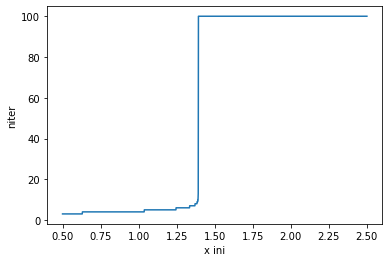

In [4]:
xs = np.linspace(0.5, 2.5, num=3000)
ns = []
for x in xs:
    p,n = newton_solve(np.arctan, cauchy, 0, x)
    ns.append(n)
plt.plot(xs,ns)
plt.xlabel("x ini")
plt.ylabel("niter")
ax = plt.gca();

In [5]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [6]:
ys = ax.lines[0].get_ydata()
assert 3 <= min(ys) <= 10
assert max(ys) == 100

In [7]:
ax = None

Refaça o gráfico, para destacar a transição

In [8]:
import warnings

# Senão vai ficar muito pesado...
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", message="overflow encountered in double_scalars")

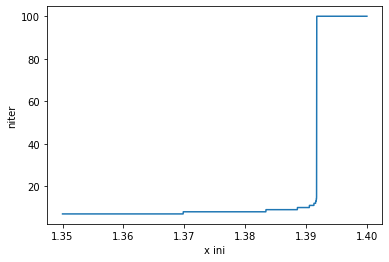

In [9]:
xs = np.linspace(1.35,1.4, num=3000)
ns = []
for x in xs:
    p,n = newton_solve(np.arctan, cauchy, 0, x)
    ns.append(n)
plt.plot(xs,ns)
plt.xlabel("x ini")
plt.ylabel("niter")
ax = plt.gca()

In [10]:
assert len(ax.lines) == 1
xs = ax.lines[0].get_xdata()
ys = ax.lines[0].get_ydata()
assert max(xs) - min(xs) <= 0.25
assert 3 <= min(ys) <= 10
assert max(ys) == 100

In [11]:
ax = None

Porque os `assert`s acima garantem o destaque?

Do primeiro gráfico notamos que a transição ocorre para um valor de x entre 1.25 e 1.5, portanto o assert max(xs) - min(xs) <= 0.25 garante estamos analisando unicamente esse intervalo. Além disso, percebe-se que antes da transição o número de iterações era menor do que 20 e, após, atingi-se o limite niter = 100. Os asserts assert 3 <= min(ys) <= 10 e assert max(ys) == 100 garantem essa última condição. 

## Questão 2: Calculando a transição

Use o método da bisseção para calcular
- o último valor (`float` do python) de $x_0$ para o qual o método de Newton encontra a raiz do arco tangente; e (ao mesmo tempo)
- o primeiro valor de $x_0$ para o qual o método não encontra a raiz.

Chame-os de `a` e `b`.

In [12]:
a = 1.25
b = 1.5
def condicao_parada_bissecao(a,b,xtol,niter,maxiter):
    return abs(a - b) < xtol or niter == maxiter
def bissect(a,b,f,df,y,xtol=1e-8,maxiter=1000):
    niter = 0
    while(not condicao_parada_bissecao(a,b,xtol,niter,maxiter)):
        m = (a+b)/2
        not_success = newton_solve(f,df, y, m, maxiter=100)[1] >= 100
        if(not_success != 0):
            b = m
        else:
            a = m
        niter+=1
    return a,b

In [13]:
a,b = bissect(a,b,np.arctan,cauchy,0,0,10000)

In [14]:
r, n = newton_solve(np.arctan, cauchy, 0, a, maxiter=100)
assert np.abs(r) < 1e-8
assert 30 < n < 100

In [15]:
r, n = newton_solve(np.arctan, cauchy, 0, b, maxiter=1000)
assert np.abs(r) > 1e-1
assert n == 1000

In [16]:
assert 0 < b-a < 3e-16

## Questão 3: Um gráfico mais preciso

Faça o gráfico do número de iterações para vários pontos "até chegar em $a$".
Pense nas escalas, e também em como "se aproximar de $a$".

In [17]:
a

1.3917452002707347

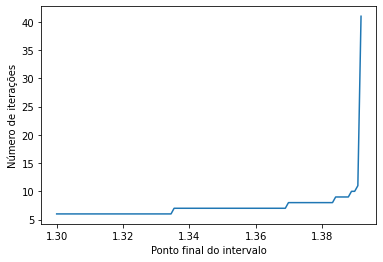

In [18]:
x = np.logspace(np.log(1.3),np.log(a-1e-20),100, base = np.e)
plt.plot(x, [newton_solve(np.arctan,cauchy,0,xi)[1] for xi in x])
plt.xlabel('Ponto final do intervalo')
plt.ylabel('Número de iterações')
ax = plt.gca()

In [19]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

ys = ax.lines[0].get_ydata()
assert 3 <= min(ys) <= 10
assert 40 < max(ys) < 60

In [20]:
ax = None

Quão rápido (ou devagar) o método de Newton para de funcionar ao se aproximar de $a$?

O método demora para parar de funcionar, somente quando está muito próximo de a que o número de iterações atinge um valor alto. Assim, quando está perto de a, o crescimento é extremamente rapido.

O que acontece com o método de Newton no ponto $b$?
Faça as contas (ou gráfico(s)) abaixo, e explique em seguida

In [21]:
b

1.391745200270735

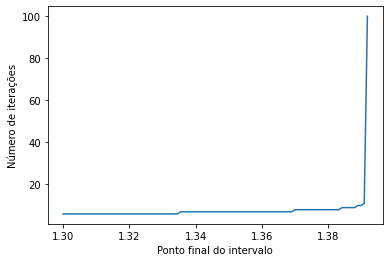

In [22]:
x = np.logspace(np.log(1.3),np.log(b-1e-20),100, base = np.e)
plt.plot(x, [newton_solve(np.arctan,cauchy,0,xi)[1] for xi in x])
plt.xlabel('Ponto final do intervalo')
plt.ylabel('Número de iterações')
ax = plt.gca()

O gráfico indica que o método é ainda mais devegar para parar de funcionar quando chega em b.

## Questão 4: Encontrando outras raízes

Vamos ver o que acontece quando, em vez de zero, queremos resolver $\arctan(x) = y$, para outros valores de $y$.

In [23]:
def transição(f, df, y, a, b):
    """Encontra uma transição do método de Newton para resolver  f(x) = y  no intervalo [a,b].
    Retorna o par de pontos limite."""
    return bissect(a,b,f,df,y,xtol=0,maxiter=10000)

In [24]:
# Deveria reproduzir os resultados da parte anterior
a, b = transição(np.arctan, cauchy, 0, 0, 2)
assert 0 < b-a < 3e-16

In [25]:
# Agora, tentando achar outra raiz
a, b = transição(np.arctan, cauchy, 0.1, 0, 4)
assert 0 < b-a < 3e-16

In [26]:
xsol, niters = newton_solve(np.arctan, cauchy, 0.1, a)
assert np.isclose(np.arctan(xsol), 0.1)

xsol, niters = newton_solve(np.arctan, cauchy, 0.1, b)
assert niters == 100

In [27]:
# Transição para uma raiz ainda mais longe
a, b = transição(np.arctan, cauchy, 1, 0, 4)
assert 0 < b-a < 5e-16

## Questão 5: Iterações perto da transição

Quais são os 20 primeiros valores gerados a partir de $a$, ao resolver $\arctan(x) = 1$?
E $b$?
Faça um gráfico, para comparar.

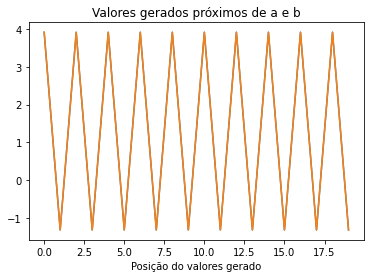

In [28]:
a, b = transição(np.arctan, cauchy, 1, 0, 4)
xsola, nitersa = newton_solve(np.arctan, cauchy, 1, a, full=True)
xsolb, nitersb = newton_solve(np.arctan, cauchy, 1, b, full=True)
x = np.arange(0,20)
plt.plot(x, [xsola[i] for i in x])
plt.plot(x, [xsolb[i] for i in x])
plt.title('Valores gerados próximos de a e b')
plt.xlabel('Posição do valores gerado')
ax = plt.gca()

In [29]:
assert len(ax.lines) == 2
assert ax.get_title() != ""
assert ax.get_xlabel() != ""

In [30]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert 0 == min(xs)
    assert max(xs) >= 19
    assert  3.5 <= max(ys) <= 4
    assert -1.5 <= min(ys) <= -1

In [31]:
ax = None

Faça um gráfico (usando os 20 pontos gerados a partir de $a$ e $b$) que ajude a ver porque esses métodos estão dando resultados diferentes

In [32]:
np.mean(xsola)

1.3526063785153577

O que este gráfico mostra?
Porque ajuda a entender o comportamento perto de $a$ e $b$?

O gráfico mostra uma oscilação dos autovalores encontrados de forma iterativa em torno de 1,35. Devido ao comportamento cíclico, o algoritmo é incapaz de convergir, fazendo com que a condição de término seja estritamente o número de iterações. 

Faça o gráfico dos 10 pontos **seguintes** para cada um dos casos, no mesmo eixo.
Use o recorte em $y$ indicado.

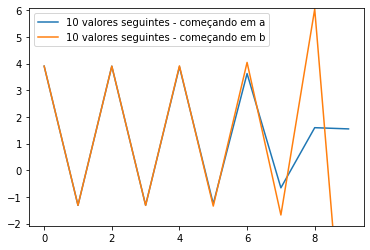

In [33]:
x = np.arange(0,10)
plt.plot(x, [xsola[i+20] for i in x], label = '10 valores seguintes - começando em a')
plt.plot(x, [xsolb[i+20] for i in x], label = '10 valores seguintes - começando em b')
plt.legend()

ax = plt.gca()
ax.set_ylim([-2.08,6.08]);

In [34]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [35]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert 0 == min(xs)
    assert 9 == max(xs)

Esse caso é ligeiramente diferente do anterior no comportamento das iterações a partir de $b$.
É um problema de precisão: se houvesse mais números entre $a$ e $b$, seria possível ver o mesmo comportamento.

Explique porquê.

# Parte 2: Autovalores e Autovetores

## Questão 6: O maior autovalor

Dê, abaixo, o código para calcular o maior autovalor de uma matriz $A$, começando a partir do vetor $v$:

In [36]:
def max_ev(A, v, tol=1e-8):
    """Iteração de potência para encontrar Au = lu, com o maior autovalor em módulo de uma matriz.
    Retorna par (autovalor, autovetor), e o número de iterações"""
    n, m = np.shape(A)
    assert n == m
    z = v/np.linalg.norm(v)
    residuo = 1000
    l = niters = 0
    while(residuo > tol):
        v = np.dot(A,z)
        norm = np.linalg.norm(v)
        l = np.dot(v,z)
        residuo = np.linalg.norm(A@z-l*z)
        z = v / norm
        niters += 1
    return z,l,niters

In [37]:
A = [[1, 2], [2, 3]]
u, l, niters = max_ev(A, [1,1])
assert l > 4
assert np.allclose(A@u, l*u)
assert 4 < niters < 8

AssertionError: 

In [38]:
A = [[1, 2], [2, 3]]
u, l, niters = max_ev(A, [1,1], tol=1e-13)
assert l > 4
assert np.allclose(A@u, l*u, atol=1e-12, rtol=1e-12)
assert 8 < niters < 12

AssertionError: 

In [39]:
np.random.seed(7)
A = np.random.randn(7,7)
A += A.T
u, l, niters = max_ev(A, np.ones(7))
assert np.allclose(A@u, l*u)
assert 150 < niters < 250

In [40]:
np.random.seed(7)
A = np.random.randn(7,7)
A += A.T
u, l, niters = max_ev(A, np.ones(7), tol=1e-12)
assert np.allclose(A@u, l*u, atol=1e-11, rtol=1e-11)
assert 250 < niters < 350

## Questão 7: Variando o vetor inicial

Em $R^2$, podemos variar o vetor inicial dando um ângulo entre $0$ e $2\pi$.
Faça o gráfico do número de iterações necessárias para atingir precisão $10^{-12}$, em função do ângulo.

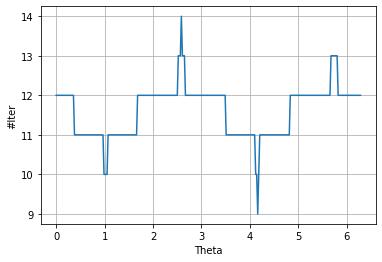

In [41]:
A = [[1, 2], [2,3]]
thetas = np.linspace(0, 2*np.pi, num=300)
n_iters = []
for theta in thetas:
    v = np.array([np.cos(theta),np.sin(theta)])
    n_iters.append(max_ev(A,v,1e-12)[2])
plt.plot(thetas,n_iters)  
plt.xlabel("Theta")
plt.ylabel("#Iter")
plt.grid()
ax = plt.gca()

In [42]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [43]:
ax = None

O que você observa no gráfico?

Primeiramente percebe-se que ele é cíclico. Em segundo lugar, o gráfico gerado se assemelha a sobreposicao de funções onda quadradas, cada qual com magnitude e períodos distintos.

## Questão 8: Menos iterações

Faça um "zoom" numa vizinhança do ângulo com menos interações.

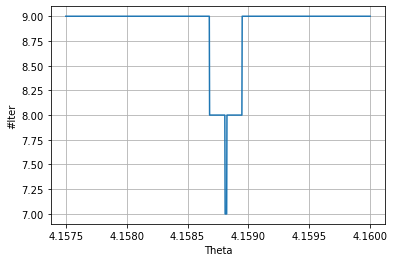

In [49]:
thetas = np.linspace(4.1575, 4.16, num=1000)
n_iters = []
for theta in thetas:
    v = np.array([np.cos(theta),np.sin(theta)])
    n_iters.append(max_ev(A,v,1e-12)[2])
plt.plot(thetas,n_iters)  
plt.xlabel("Theta")
plt.ylabel("#Iter")
plt.grid()
ax = plt.gca()

In [50]:
assert len(ax.lines) == 1

xs = ax.lines[0].get_xdata()
assert max(xs) - min(xs) <= 0.1

ys = ax.lines[0].get_ydata()
assert max(ys) < 10
assert min(ys) < 8

In [51]:
def get_Rayleigh_quocient(A,v):
    return np.dot(v.T,np.dot(A,v))/np.dot(v.T,v)

In [52]:
get_Rayleigh_quocient(A,np.array([0,1]))

3.0

Como calcular um ângulo com menos iterações ainda?
Explique na caixa abaixo, e em seguida calcule $\theta_\text{min}$.

Dica: Veja a função `np.arctan2`.

Podemos ver a metriz acima como 

Basta obter um vetor inicial que consiga obter menos iterações e, então, utilizar a função sugerida para calcular seu angulo, considerando as entradas do vetor como coordenadas no plano. Um vetor que tenha menos iterações será o algo próximo do próprio autovetor, abaixo então foi feito um calculo do autovetor e encontrado seu angulo.

In [53]:
einv= max_ev(A,v,1e-12)[0]
np.arctan2(einv[1],einv[0])

-2.124370685691948

In [61]:
-2.124370685691948 + 2*np.pi

4.158814621487638

Com isso, faça um gráfico mostrando todos os números de iteração menores do que 8 que você conseguir.

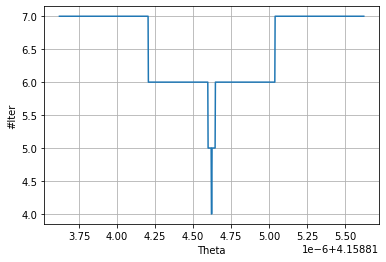

In [62]:
e = 0.000001
thetas = np.linspace(4.158814621487638-e,4.158814621487638+e, num=1000)
n_iters = []
for theta in thetas:
    v = np.array([np.cos(theta),np.sin(theta)])
    if max_ev(A,v,1e-12)[2]<= 8:
        n_iters.append(max_ev(A,v,1e-12)[2])
    else:
        thetas = np.delete(thetas,np.where(thetas==theta))
plt.plot(thetas,n_iters)  
plt.xlabel("Theta")
plt.ylabel("#Iter")
plt.grid()
ax = plt.gca()

O que você observa no gráfico acima?

O gráfico acima tenta ser centrado no ângulo do autovetor e por isso parece simétrico (apesar de não ser exatamente). Seus valores mais internos (mais próximos do ângulo real) apresentam menos iterações, como esperado, e os mais afastados apresentam um máximo de 5 iterações, como requisitado

O que este gráfico tem a ver com a velocidade de convergência do método?

Primeiramente, quanto mais próximo do valor correto, mais rápido o algoritmo converge, como pode ser visto no gráfico. Segundo, o método em pequenos intervalos tem passos de somente uma iteração, por conta dos valores serem muito próximos. Além disso, eles são trivialmente discretos.

## Questão 9: Mais iterações

Como calcular o ângulo correspondente ao maior número de iterações?
Explique abaixo, e calcule em seguida.

Podemos pensar que o vetor que mais demora a se aproximar do autovetor é aquele que está mais distante, relativamente ao angulo que faz com o autovetor. Portanto, é natural que consideremos uma rotação de 90 graus entre os dois, o que de fato os gráficos anteriores parecem indicar. Tendo as "coordenadas" basta utilizar a funcao arctan2.

In [65]:
einv

array([-0.52573111, -0.85065081])

In [66]:
maxe = np.array([0.85065081,-0.52573111])
max_ev(A,maxe,1e-12)[2]

18

In [67]:
np.arctan2(maxe[1],maxe[0])

-0.5535743562280186

In [68]:
-0.5535743562280186 + 2*np.pi

5.729610950951567

Conhecendo o valor do angulo mínimo, outra forma direta para obter o máximo seria somar pi/2.

Faça, então, um gráfico mostrando, pelo menos, desde 12 até o maior número possível de iterações.

Obs: uma forma de aumentar o número de iterações é reduzir a tolerância.
Só não tente ser "preciso demais", pois isso pode acabar sendo mais do que a precisão do computador,
e daí a iteração nunca mais pára.

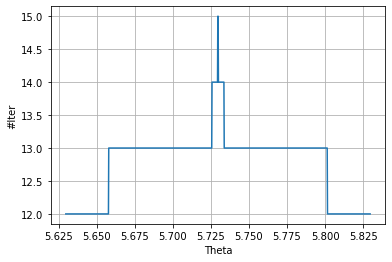

In [74]:
e = 0.1
thetas = np.linspace(5.729610950951567-e, 5.729610950951567+e, num=1000)
n_iters = []
for theta in thetas:
    v = np.array([np.cos(theta),np.sin(theta)])
    if max_ev(A,v,1e-12)[2]>= 12:
        n_iters.append(max_ev(A,v,1e-12)[2])
    else:
        thetas = np.delete(thetas,np.where(thetas==theta))
plt.plot(thetas,n_iters)  
plt.xlabel("Theta")
plt.ylabel("#Iter")
plt.grid()
ax = plt.gca()

## Questão 10: Aplicação de iteração

Programe a função $h : [-\pi, \pi] \mapsto [-\pi, \pi]$ que, a um ângulo $\theta$,
associa o ângulo do vetor $Av$, onde $v$ tem ângulo $\theta$.

In [75]:
def h(A, theta):
    m, n = np.shape(A)
    assert m == n == 2
    v = np.array([np.cos(theta), np.sin(theta)])
    w = A@v
    return np.arctan2(w[1],w[0])

In [76]:
assert h(A, 1) > 1

In [77]:
assert h(A, 2) < 2

In [78]:
assert h(A, -2) < -2

Qual a imagem do intervalo $I_0 = [0, \pi/2]$ por esta aplicação?

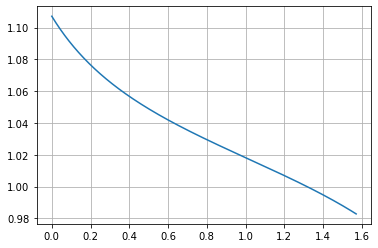

In [79]:
I = np.linspace(0,np.pi/2, num=500)
plt.plot(I,h(A,I))
plt.grid();

A imagem é [arctan(3/2), arctan(2)], ou seja, o intervalo entre os angulos dos vetores colunas da matriz A.

In [88]:
np.arctan(2)

1.1071487177940904

In [89]:
np.arctan(3/2)

0.982793723247329

Agora, faça um gráfico do comprimento da imagem dos intervalos $I_n = h(I_{n-1})$, em função de $n$.

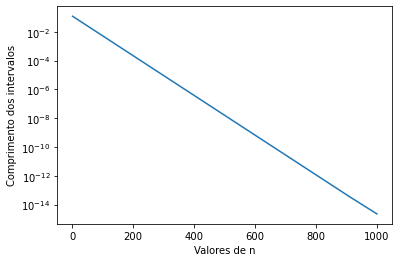

In [91]:
last = h(A,I)
images = [np.amax(last)-np.amin(last)]
ns = np.linspace(1,1000, num=12)
for i in range(len(ns)-1):
    last  = h(A,last)
    images+=[np.amax(last)-np.amin(last)]
    

plt.plot(ns,images)
plt.ylabel('Comprimento dos intervalos')
plt.xlabel('Valores de n')
plt.yscale('log')
ax = plt.gca()

In [92]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Enfim, faça um gráfico de $h$, no intervalo $[-\pi, \pi]$.

Trace, também, a diagonal $y = x$.

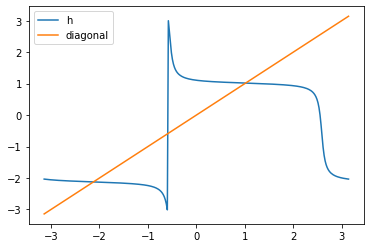

In [93]:
thetas = np.linspace(-np.pi, np.pi, num=300)

plt.plot(thetas, h(A,thetas), label = 'h')
plt.plot(thetas, thetas, label = 'diagonal')
plt.legend()
ax = plt.gca()

In [94]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [95]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert np.isclose(min(xs), -np.pi)
    assert np.isclose(max(xs),  np.pi)
    assert np.isclose(min(ys), -np.pi, rtol=1e-1)
    assert np.isclose(max(ys),  np.pi, rtol=1e-1)

Como esse gráfico ajuda a explicar as questões anteriores?

A função h iterada, como feito para encontrar o comprimento das imagens, funciona de forma similar ao método da potência nesse caso. Isto é, começamos com um angulo (que equivale ao vetor de chute inicial) e, ao aplicar h sucessivamente, convergimos para um outro angulo que é, de fato, o angulo de algum autovetor da matriz A dada.

Portanto, o gráfico acima traduz o comportamento explicitado nas questões anteriores. Nos pontos de encontro entre h e a diagonal temos que a direção dos vetores v e Av são a mesma, ou seja, são os autovetores. Dessa forma, o gráfico em azul acima explica a quantidade de iterações seguir um comportamento quase simétrico em relação aos angulos dos autovalores - aqui mostrados como essas interseções, tendo seus pontos de mínimo/máximo nos locais que mais iterações são necessárias.

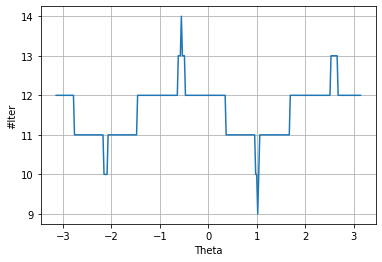

In [97]:
A = [[1, 2], [2,3]]
thetas = np.linspace(-np.pi, np.pi, num=300)
n_iters = []
for theta in thetas:
    v = np.array([np.cos(theta),np.sin(theta)])
    n_iters.append(max_ev(A,v,1e-12)[2])
plt.plot(thetas,n_iters)  
plt.xlabel("Theta")
plt.ylabel("#Iter")
plt.grid()
ax = plt.gca()

Acima está reproduzido o gráfico para o número de iterações considerando o intervalo [-pi,pi]. Nota-se, como explicado acima, que os pontos de minimo são as interções da reta com o gráfico de h e os máximo são os pontos mais distantes destes.